# Lending Club Case Study

    Group Members:  Naresh Behera
                    Naina Agarwal
       
       
## Business Objectives
Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### The analysis is divided into four main parts:

1. Data Understanding
2. Data Cleaning (cleaning missing values, removing redundant columns etc.) and Manipulation 
3. Data Analysis:

   i> Univariate<br> 
   ii> Segmented Univariate Analysis<br>
   iii> Bivariate Analysis
   
4. Presentaion and Recomendtion
  

### 1. Data Understanding

In [191]:
#Load the Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [192]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# Ignore Warnings
warnings.filterwarnings('ignore')

In [193]:
# Load the loan data into one data frame and name it as loan.
loan=pd.read_csv('loan.csv', engine='python')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [194]:
# Dataframe shape
loan.shape

(39717, 111)

In [195]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

##### Our main focus is to use EDA to understand how consumer attributes and loan attributes influence the tendency of default

In [196]:
# Check the information of df loan
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [197]:
#How many observations are present in loan?
#len(loan.index)

loan[loan.columns[0]].count()

39717

In [198]:
# Check null values in df loan
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [199]:
# Calculate null values percent in each column
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                 0.000
member_id                          0.000
loan_amnt                          0.000
funded_amnt                        0.000
funded_amnt_inv                    0.000
term                               0.000
int_rate                           0.000
installment                        0.000
grade                              0.000
sub_grade                          0.000
emp_title                          6.190
emp_length                         2.710
home_ownership                     0.000
annual_inc                         0.000
verification_status                0.000
issue_d                            0.000
loan_status                        0.000
pymnt_plan                         0.000
url                                0.000
desc                              32.580
purpose                            0.000
title                              0.030
zip_code                           0.000
addr_state                         0.000
dti             

### 2. Data Cleaning

In [200]:
# If we check, there are multiple columns which contains 100% null values. This won't help us in our anlysis. Hence, these columns can be dropped from df
master_frame_loan = loan.dropna(inplace=False, how='all', axis=1)
master_frame_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,nan,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [201]:
# Shape of new df master_frame_loan
master_frame_loan.shape

(39717, 57)

In [202]:
# Calculate null values percent in each column of the df master_frame_loan
round(100*(master_frame_loan.isnull().sum()/len(master_frame_loan.index)), 2)

id                            0.000
member_id                     0.000
loan_amnt                     0.000
funded_amnt                   0.000
funded_amnt_inv               0.000
term                          0.000
int_rate                      0.000
installment                   0.000
grade                         0.000
sub_grade                     0.000
emp_title                     6.190
emp_length                    2.710
home_ownership                0.000
annual_inc                    0.000
verification_status           0.000
issue_d                       0.000
loan_status                   0.000
pymnt_plan                    0.000
url                           0.000
desc                         32.580
purpose                       0.000
title                         0.030
zip_code                      0.000
addr_state                    0.000
dti                           0.000
delinq_2yrs                   0.000
earliest_cr_line              0.000
inq_last_6mths              

In [203]:
# Also the columns desc, mths_since_last_delinq, mths_since_last_record and next_pymnt_d are having null values 64%,92% and 97% respectively. Hence, these columns are not relevant for our EDA.Let's drop these columns.
#So, let's drop these irrelevant columns also
master_frame_loan = master_frame_loan.drop(['desc','mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)
master_frame_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


#####  Let's drop redundant Columns which would be no longer  required for our EDA (Beow is the list of redundant columns and this list needs to be updated when any column is  found unusable during EDA):
    
            1.  member_id
            2.  pymnt_plan
            3.  url
            4.  zip_code
            5.  initial_list_status
            6.  collections_12_mths_ex_med
            7.  policy_code
            8. application_type
            9. acc_now_delinq
            10. chargeoff_within_12_mths
            11. delinq_amnt
            12. tax_liens
            13. title
            14. total_rec_prncp
            15. total_rec_int
            16. total_rec_late_fee
            17. recoveries
            18. collection_recovery_fee
            19. last_pymnt_amnt
            20. revol_bal

In [204]:
# Dropping Redundnt columns
master_frame_loan.drop(labels = ['member_id', 'pymnt_plan', 'url', 'zip_code', 'initial_list_status', 
                    'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 
                    'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'revol_bal'],
          axis = 1, inplace = True
         )

In [205]:
# Let's check Shape of df master_frame_loan again
master_frame_loan.shape

(39717, 33)

In [206]:
# Let's find out the columns with missing values
print(sum(round(master_frame_loan.isnull().sum()/len(loan)*100, 2) > 0))

6


In [207]:
### Display columns of master_frame_loan,  those have missing values percentaage > 0
round(master_frame_loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_title              6.190
emp_length             2.710
revol_util             0.130
last_pymnt_d           0.180
last_credit_pull_d     0.010
pub_rec_bankruptcies   1.750
dtype: float64

In [208]:
# Let's remove null values in these columns

master_frame_loan.dropna(subset=['emp_title','emp_length','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)

In [209]:
# Let's recheck the columns with missing values
print(sum(round(master_frame_loan.isnull().sum()/len(loan)*100, 2) > 0))

0


In [210]:
# Let's recheck Shape of df master_frame_loan again
master_frame_loan.shape

(36442, 33)

In [211]:
# Reset the index as we have dropped some rows
master_frame_loan.reset_index(drop=True, inplace=True)

##### Finally, we have 31 columns and 36442 rows on which we would perform EDA. Before that Let's analyze the data of each tuple(rows) 

### 3. Data Analysis

In [212]:
# Check if any row has more than 5 missing values
len(master_frame_loan[master_frame_loan.isnull().sum(axis=1) > 5].index)

0

##### Now data looks good. Let's also check if all columns have exepcted datatype and are in the correct format.

In [213]:
master_frame_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36442 entries, 0 to 36441
Data columns (total 33 columns):
id                      36442 non-null int64
loan_amnt               36442 non-null int64
funded_amnt             36442 non-null int64
funded_amnt_inv         36442 non-null float64
term                    36442 non-null object
int_rate                36442 non-null object
installment             36442 non-null float64
grade                   36442 non-null object
sub_grade               36442 non-null object
emp_title               36442 non-null object
emp_length              36442 non-null object
home_ownership          36442 non-null object
annual_inc              36442 non-null float64
verification_status     36442 non-null object
issue_d                 36442 non-null object
loan_status             36442 non-null object
purpose                 36442 non-null object
addr_state              36442 non-null object
dti                     36442 non-null float64
delinq_2yrs     

In [214]:
# To verify data in int_rate, revol_util and term
master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,3,0,9.40%,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000
1,1076863,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,10,0,21%,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000


In [215]:
# Column int_rate,revol_util and term are character type, let's convert it to float
master_frame_loan['int_rate'] = master_frame_loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [216]:
# Column revol_util is of character type, let's convert it to float
master_frame_loan['revol_util'] = master_frame_loan['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [217]:
# Column term is of character type, let's convert it to float
#master_frame_loan['term'] = master_frame_loan['term'].apply(lambda x: pd.to_numeric(x.split("months")[0]))

In [218]:
# Checkig the data types 
master_frame_loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util              float64
total_acc                 int64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_d             object
last_cre

In [219]:
# To verify data in int_rate, revol_util and term once again
master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000


In [220]:
# Let's rename the columns int_rate to int_rate_percent

master_frame_loan.rename(columns = {'int_rate': 'int_rate_percent'}, inplace = True)


master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000


In [221]:
# Let's rename other two columns revol_util to revol_util_percent and term to term_in_months

master_frame_loan.rename(columns = {'revol_util': 'revol_util_percent'}, inplace = True)
#master_frame_loan.rename(columns = {'term': 'term_in_months'}, inplace = True)

master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,GA,1.000,0,Apr-99,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,CA,20.000,0,Feb-96,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000


In [222]:
#Checking unique values for loan_status column
master_frame_loan.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [223]:
# Check record count in each category
master_frame_loan.loan_status.value_counts()

Fully Paid     30432
Charged Off     4944
Current         1066
Name: loan_status, dtype: int64

From above result, we can see that "Fully Paid" contains most of the loans. 'Current' is neither fully paid not defaulted, so let's drop the records with values as Current. 

In [224]:
# Let's keep records with values 'Charged Off', 'Fully Paid' only 
master_frame_loan = master_frame_loan[master_frame_loan['loan_status'] != 'Current']

#Let's update boolen values 0 for "Fully Paid" or 1 for "Charged Off"
#master_frame_loan['loan_status'] = master_frame_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
#master_frame_loan['loan_status'] = master_frame_loan['loan_status'].astype(int)

# summarising the values
master_frame_loan['loan_status'].value_counts()

Fully Paid     30432
Charged Off     4944
Name: loan_status, dtype: int64

In [225]:
#Checking unique values for term column
master_frame_loan.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [226]:
#Striping the spaces of the column term
master_frame_loan['term']=master_frame_loan.term.str.strip()
master_frame_loan.term.unique()

array(['60 months', '36 months'], dtype=object)

### Derived Variables

Let's create new columns from date type columns e.g. issue_d and earliest_cr_line and last_pymnt_d

In [227]:
#Let's first convert datatype to date type
master_frame_loan['issue_d'] = pd.to_datetime(master_frame_loan.issue_d, format='%b-%y')
#if there are any master_frame_loan before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
master_frame_loan['issue_d'] = master_frame_loan['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

master_frame_loan['earliest_cr_line'] = pd.to_datetime(master_frame_loan.earliest_cr_line, format='%b-%y')
master_frame_loan['earliest_cr_line'] = master_frame_loan['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [228]:
#issue_d column
master_frame_loan['issue_d_year'] = master_frame_loan.issue_d.dt.year
master_frame_loan['issue_d_month'] = master_frame_loan.issue_d.dt.strftime('%b')
master_frame_loan['issue_d_weekday'] = master_frame_loan.issue_d.dt.weekday
#master_frame_loan type conversion of year and weekday
master_frame_loan['issue_d_year'] = master_frame_loan['issue_d_year'].astype(object)
master_frame_loan['issue_d_month'] = master_frame_loan['issue_d_month'].astype(object)
master_frame_loan['issue_d_weekday'] = master_frame_loan['issue_d_weekday'].astype(object)

#earliest_cr_line
master_frame_loan['earliest_cr_line_year'] = master_frame_loan.earliest_cr_line.dt.year
master_frame_loan['earliest_cr_line_month'] = master_frame_loan.earliest_cr_line.dt.strftime('%b')
#master_frame_loan type conversion of year and weekday
master_frame_loan['earliest_cr_line_year'] = master_frame_loan['earliest_cr_line_year'].astype(object)
master_frame_loan['earliest_cr_line_month'] = master_frame_loan['earliest_cr_line_month'].astype(object)

In [229]:
master_frame_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35376 entries, 0 to 36441
Data columns (total 38 columns):
id                        35376 non-null int64
loan_amnt                 35376 non-null int64
funded_amnt               35376 non-null int64
funded_amnt_inv           35376 non-null float64
term                      35376 non-null object
int_rate_percent          35376 non-null float64
installment               35376 non-null float64
grade                     35376 non-null object
sub_grade                 35376 non-null object
emp_title                 35376 non-null object
emp_length                35376 non-null object
home_ownership            35376 non-null object
annual_inc                35376 non-null float64
verification_status       35376 non-null object
issue_d                   35376 non-null datetime64[ns]
loan_status               35376 non-null object
purpose                   35376 non-null object
addr_state                35376 non-null object
dti               

In [230]:
master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,2011-12-01,Charged Off,car,GA,1.000,0,1999-04-01,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000,2011,Dec,3,1999,Apr
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,2011-12-01,Fully Paid,other,CA,20.000,0,1996-02-01,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000,2011,Dec,3,1996,Feb


In [231]:
# Let's use regular expression to extract numeric values from the string
import re
master_frame_loan['emp_length'] = master_frame_loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
master_frame_loan['emp_length'] = master_frame_loan['emp_length'].astype(int)

In [232]:
master_frame_loan.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate_percent                 float64
installment                      float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                         int32
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_util_perce

In [233]:
master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,1,RENT,30000.000,Source Verified,2011-12-01,Charged Off,car,GA,1.000,0,1999-04-01,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000,2011,Dec,3,1999,Apr
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10,RENT,49200.000,Source Verified,2011-12-01,Fully Paid,other,CA,20.000,0,1996-02-01,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000,2011,Dec,3,1996,Feb


In [234]:
# Creating Approved Loan amount percent which is a ratio of Funded Amount by investor to Requested Loan amount multiplied by 100.
master_frame_loan['approved_loan_amnt_percent'] = round(((master_frame_loan.funded_amnt_inv*100)/master_frame_loan.loan_amnt),2)

In [235]:
master_frame_loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_percent
0,1077430,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,1,RENT,30000.000,Source Verified,2011-12-01,Charged Off,car,GA,1.000,0,1999-04-01,5,3,0,9.400,4,0.000,0.000,1008.710,1008.710,Apr-13,Sep-13,0.000,2011,Dec,3,1999,Apr,100.000
1,1076863,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10,RENT,49200.000,Source Verified,2011-12-01,Fully Paid,other,CA,20.000,0,1996-02-01,1,10,0,21.000,37,0.000,0.000,12231.890,12231.890,Jan-15,Apr-16,0.000,2011,Dec,3,1996,Feb,100.000


In [236]:
# Analyzing unique values of home_ownership. Seems, after handing null values only expected 4 category values present 
master_frame_loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [237]:
master_frame_loan.shape

(35376, 39)

In [238]:
# Dropping any Duplicate Rows, if any (Keeping the First Value and dropping the rest)
master_frame_loan.drop_duplicates(keep = 'first', inplace = True)

In [239]:
master_frame_loan.shape

(35376, 39)

### 3.1 Univariate Analysis

In [240]:
# default rate
print(round((len(master_frame_loan[master_frame_loan['loan_status'] =='Charged Off']) / len(master_frame_loan)) * 100,2))

13.98


The overall Default Rate is around 14%.


#### Loan Status

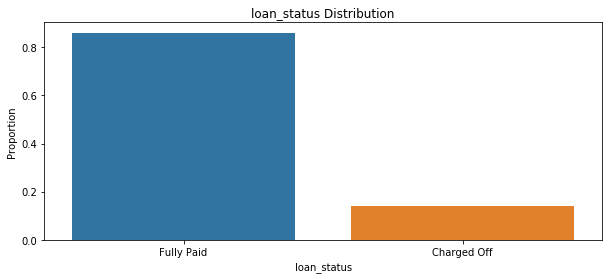

In [241]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
From the above plots,  we can conclude that ~85% of borrowers has paid the loan fully. where as ~14% are defaulted the loan.

#### Loan Amount

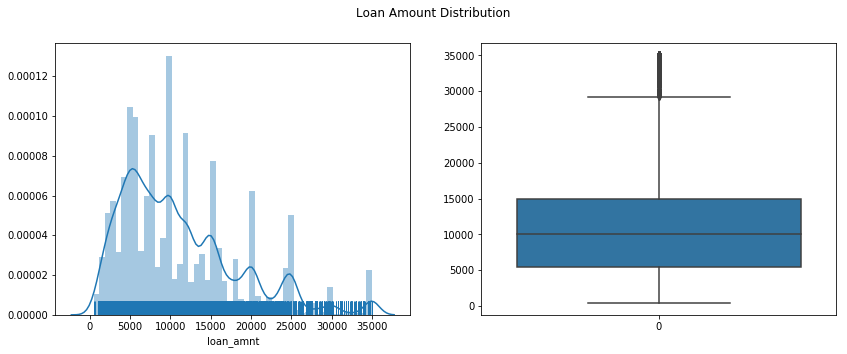

In [242]:
#Figure size of plot
plt.figure(figsize=(14,5))
#subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=master_frame_loan.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=master_frame_loan.loan_amnt)
#Title for both subplots.
plt.suptitle('Loan Amount Distribution')
plt.show()

In [243]:
# Display float values to 3 decimal places
pd.options.display.float_format = '{:.3f}'.format
master_frame_loan.loan_amnt.describe(percentiles=[0.2,0.25,0.4,0.5,0.6,0.75,0.8,0.9,0.98,0.99])

count   35376.000
mean    11132.782
std      7326.262
min       500.000
20%      5000.000
25%      5500.000
40%      8000.000
50%     10000.000
60%     11500.000
75%     15000.000
80%     16000.000
90%     21600.000
98%     30000.000
99%     35000.000
max     35000.000
Name: loan_amnt, dtype: float64

**Conclusion**:<br>
    Median value of loan_amnt is 10000.000 . From the above plot and stats, we can conclude that more people took loan of amount 10000.000 

#### funded_amnt
The total amount committed to that loan at that point in time.

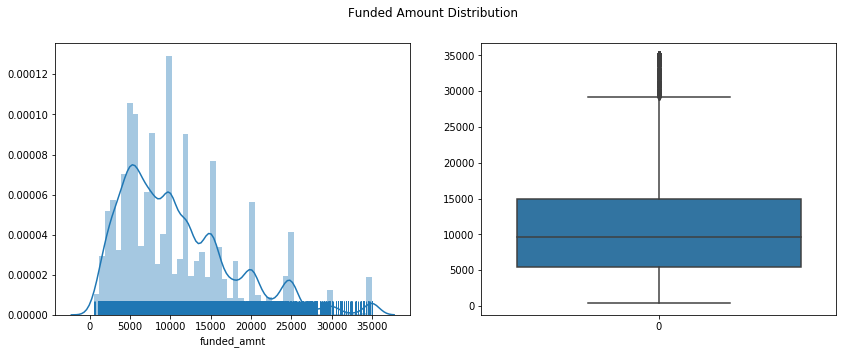

In [244]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(a=master_frame_loan.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=master_frame_loan.funded_amnt)
plt.suptitle('Funded Amount Distribution')
plt.show()

In [245]:
# Stats of funded_amnt
master_frame_loan.funded_amnt.describe(percentiles=[0.2,0.25,0.4,0.5,0.6,0.75,0.8,0.9,0.98,0.99])

count   35376.000
mean    10866.055
std      7069.366
min       500.000
20%      5000.000
25%      5500.000
40%      7775.000
50%      9600.000
60%     11000.000
75%     15000.000
80%     16000.000
90%     20000.000
98%     30000.000
99%     35000.000
max     35000.000
Name: funded_amnt, dtype: float64

**Conclusion**:<br>
Behavior of funded_amnt is same as loan_amnt. From the above plot and stats, we can conclude that most of the applied funds have been approved by Lending Club

#### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

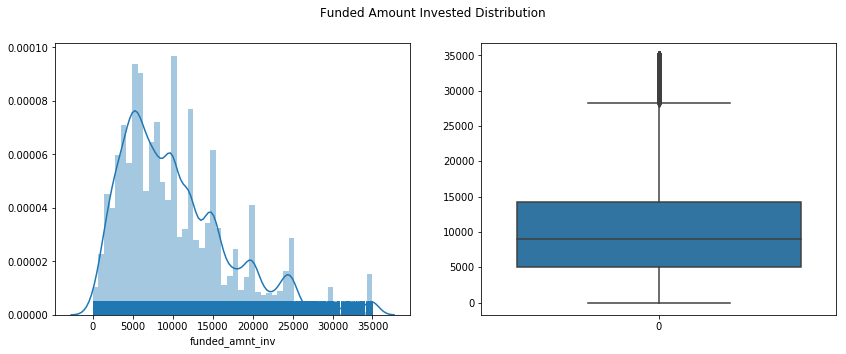

In [246]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(a=master_frame_loan.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=master_frame_loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested Distribution')
plt.show()

In [247]:
# Stats of funded_amnt_inv
master_frame_loan.funded_amnt_inv.describe(percentiles=[0.1,0.2,0.25,0.4,0.5,0.6,0.75,0.8,0.9,0.98,0.99])

count   35376.000
mean    10426.415
std      6968.199
min         0.000
10%      3000.000
20%      4750.000
25%      5000.000
40%      7200.000
50%      9000.000
60%     10261.478
75%     14300.000
80%     15000.000
90%     20000.000
98%     29890.688
99%     34648.014
max     35000.000
Name: funded_amnt_inv, dtype: float64

**Conclusion**:<br>
Behavior of funded_amnt_inv is same as loan_amnt. From the above plot and stats, we can conclude that most of the applied funds have been approved by Lending Club

#### Approved Loan Amount Percent
This is ratio of Funded Amount by investor to Requested Loan amount multiplied by 100.


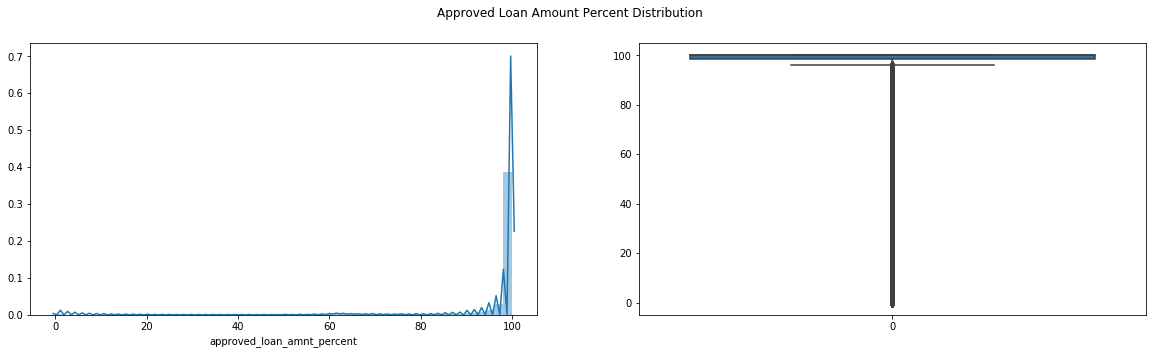

In [248]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=master_frame_loan.approved_loan_amnt_percent)
plt.subplot(1,2,2)
sns.boxplot(data=master_frame_loan.approved_loan_amnt_percent)
plt.suptitle('Approved Loan Amount Percent Distribution')
plt.show()

In [249]:
# Stats of approved_loan_amnt_percent
master_frame_loan.approved_loan_amnt_percent.describe(percentiles=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.75,0.8,0.9,0.98,0.99])

count   35376.000
mean       94.848
std        14.960
min         0.000
10%        87.175
20%        97.500
25%        98.400
30%        99.000
40%        99.670
50%        99.980
60%       100.000
75%       100.000
80%       100.000
90%       100.000
98%       100.000
99%       100.000
max       100.000
Name: approved_loan_amnt_percent, dtype: float64

**Conclusion**:<br>
   Around 70% of Borrowers got 100% loan amount from investors.

### Interest Rate

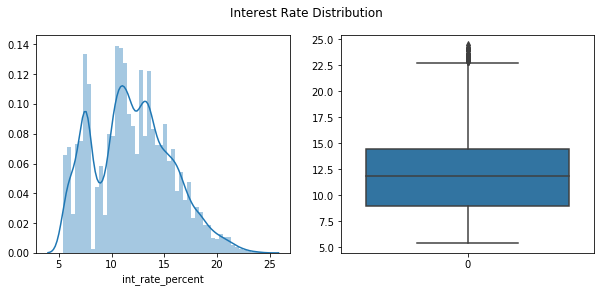

In [250]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(a=master_frame_loan.int_rate_percent)
plt.subplot(1,2,2)
sns.boxplot(data=master_frame_loan.int_rate_percent)
plt.suptitle('Interest Rate Distribution')
plt.show()

**Conclusion**:<br>
  If we closely observe the above graphs,we could see that the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

### dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


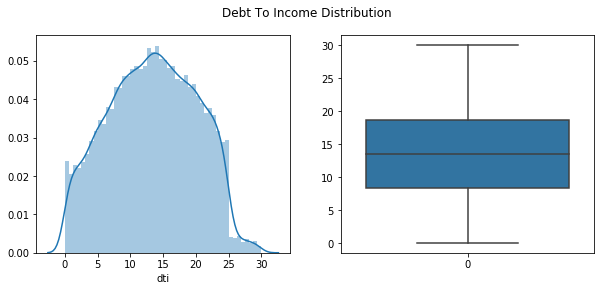

In [251]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(a=master_frame_loan.dti)
plt.subplot(1,2,2)
sns.boxplot(data=master_frame_loan.dti)
plt.suptitle('Debt To Income Distribution')
plt.show()

In [252]:
# Stats of dti
master_frame_loan.dti.describe(percentiles=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.75,0.8,0.9,0.98,0.99])

count   35376.000
mean       13.403
std         6.637
min         0.000
10%         4.220
20%         7.130
25%         8.320
30%         9.430
40%        11.520
50%        13.500
60%        15.440
75%        18.640
80%        19.790
90%        22.360
98%        24.850
99%        26.530
max        29.990
Name: dti, dtype: float64

**Conclusion**:<br>
  The graphs looks like normal distribution. This is positive sign that borrowers having dti ratio(Debt to Income) less than 30 got loans

### Earliest Credit line (earliest_cr_line)
The month the borrower's earliest reported credit line was opened

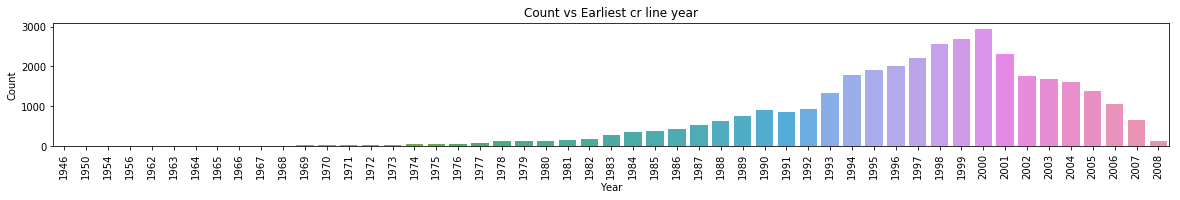

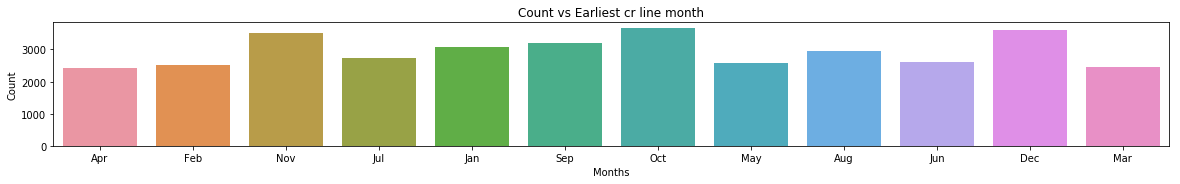

In [253]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(master_frame_loan.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(master_frame_loan.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Conclusion**:<br>
 Many of the borrowers got earlier credit line in the year 2000 and in the months like OCT, NOV and DEC 

#### Term
The number of payments on the loan. Values are in months and can be either 36 or 60.

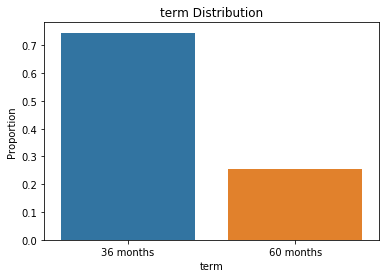

In [254]:
var = 'term'
#Probability / Percentage of each values
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
 Many of the borrowers availed the loan for the tenure 36 months than 60 months 

#### Grade
LC assigned loan grade

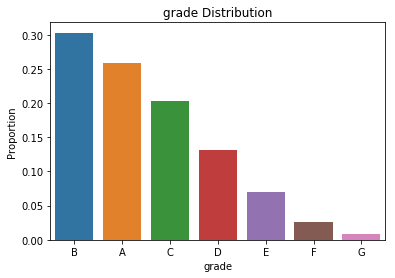

In [255]:
var = 'grade'
#Probability / Percentage of each values
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
 Most of the borrowers fall under the grades A and B

#### annual_inc
The self-reported annual income provided by the borrower during registration.

In [256]:
master_frame_loan['annual_inc'].describe()

count     35376.000
mean      69090.443
std       63960.442
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     6000000.000
Name: annual_inc, dtype: float64

In [257]:
#Removing Outliers
master_frame_loan_an_in = master_frame_loan[(master_frame_loan["annual_inc"]<=117000)]

In [258]:
# Checking stats again
master_frame_loan_an_in['annual_inc'].describe()

count    31995.000
mean     58077.169
std      23586.274
min       4000.000
25%      40000.000
50%      55000.000
75%      75000.000
max     117000.000
Name: annual_inc, dtype: float64

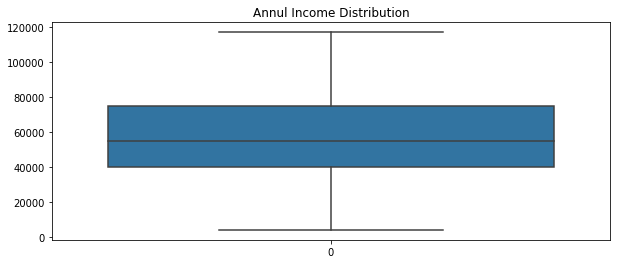

In [100]:
#master_frame_loan.funded_amnt.plot.box()
plt.figure(figsize=(10,4))
sns.boxplot(data=master_frame_loan_an_in.annual_inc)
plt.title('Annul Income Distribution')
plt.show()

**Conclusion**:<br>
After removing outlier, we could see that average annual income is 55000.

#### pub_rec
Number of derogatory public records

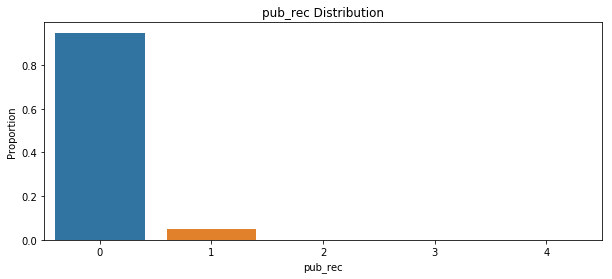

In [259]:
plt.figure(figsize=(10,4))

var = 'pub_rec'
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
~90% borrowers don't have any public derogatory records

#### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

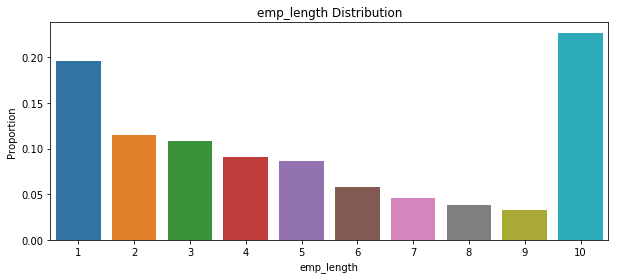

In [260]:
plt.figure(figsize=(10,4))

var = 'emp_length'
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Maximum borrowers have employement length of 10 years

#### home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


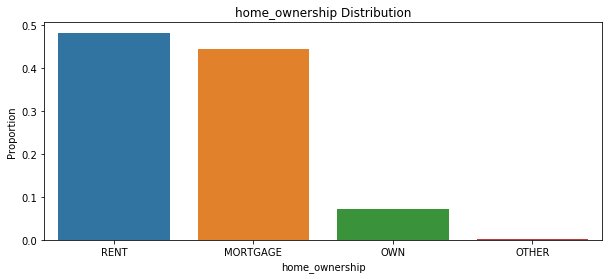

In [261]:
plt.figure(figsize=(10,4))

var = 'home_ownership'
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Maximum borrowers are staying in either RENTED or MORTGAGE Houses

#### Purpose
A category provided by the borrower for the loan request.

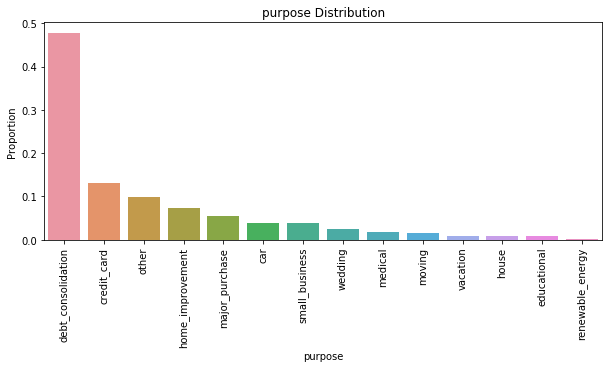

In [262]:
plt.figure(figsize=(10,4))

var = 'purpose'
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
More people are taking loans for debt_consolidation and very less people are taking loans for renewable_energy

#### Borrower's State (addr_state)

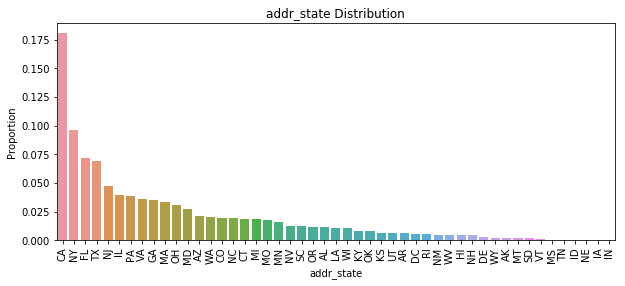

In [263]:
plt.figure(figsize=(10,4))

var = 'addr_state'
master_frame_loan_prob_df = master_frame_loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=master_frame_loan_prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.title(var+' Distribution')
plt.show()

**Conclusion**:<br>
Top four borrowers are from the states CA, NY, FL and TX

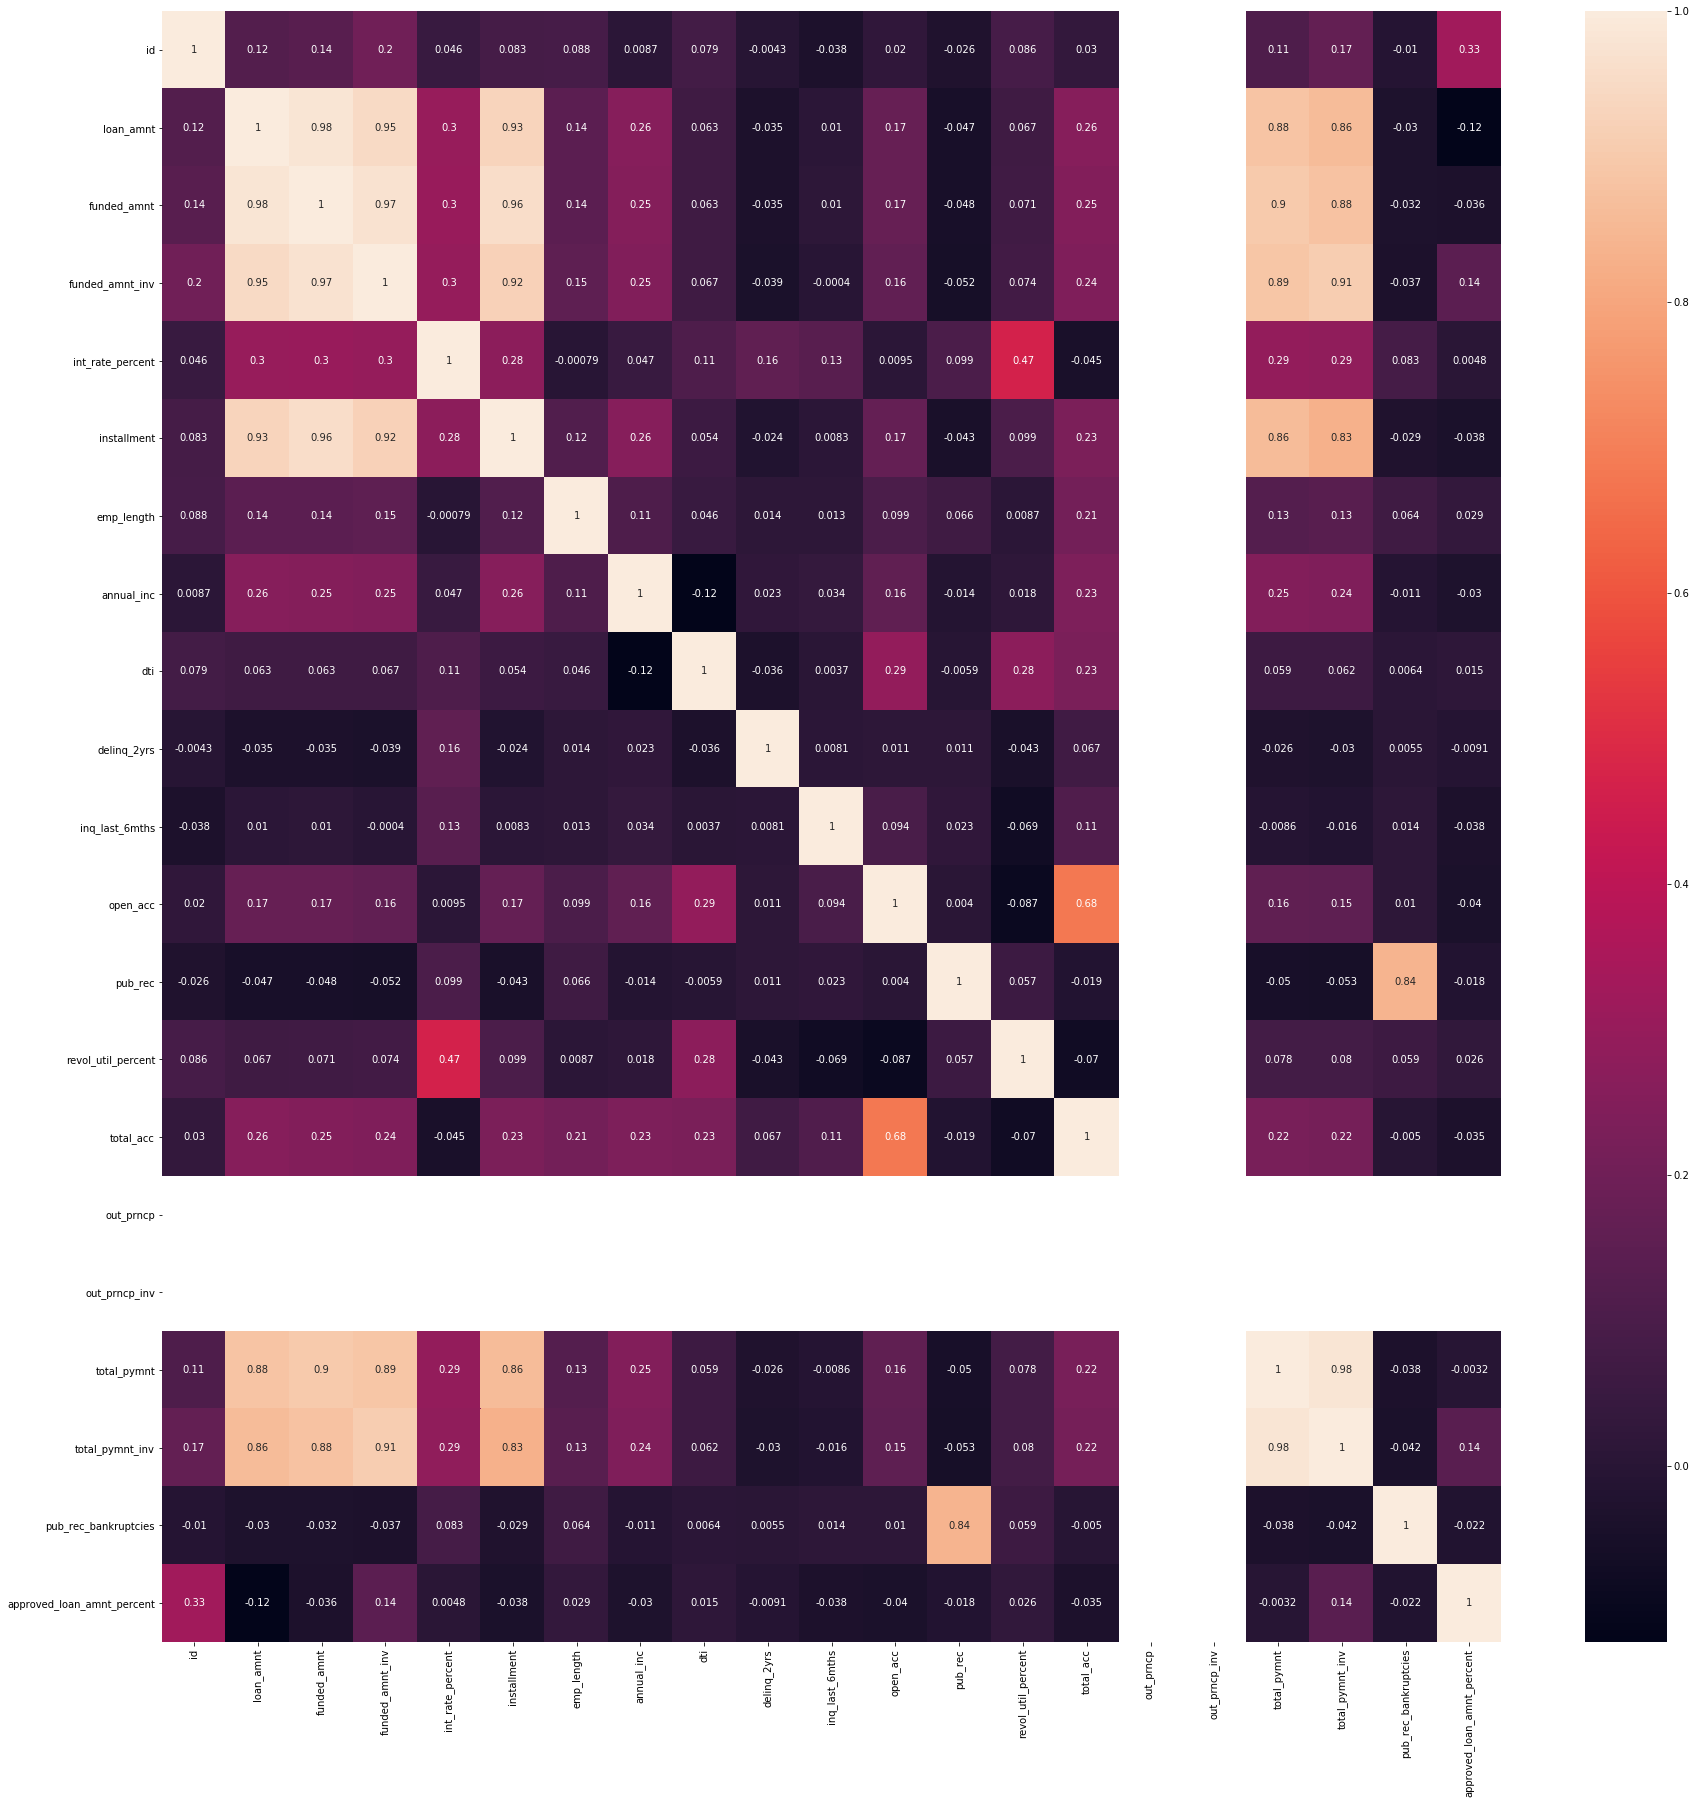

In [264]:
#Creating correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))   
sn.heatmap(master_frame_loan.corr(), annot=True, ax=ax)
plt.show()

In [265]:
master_frame_loan.corr()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_percent,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util_percent,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,approved_loan_amnt_percent
id,1.000,0.123,0.136,0.201,0.046,0.083,0.088,0.009,0.079,-0.004,-0.038,0.020,-0.026,0.086,0.030,nan,nan,0.110,0.166,-0.010,0.328
loan_amnt,0.123,1.000,0.982,0.952,0.300,0.931,0.144,0.259,0.063,-0.035,0.010,0.174,-0.047,0.067,0.256,nan,nan,0.884,0.860,-0.030,-0.121
funded_amnt,0.136,0.982,1.000,0.971,0.305,0.957,0.144,0.255,0.063,-0.035,0.010,0.173,-0.048,0.071,0.250,nan,nan,0.901,0.878,-0.032,-0.036
funded_amnt_inv,0.201,0.952,0.971,1.000,0.295,0.923,0.151,0.246,0.067,-0.039,-0.000,0.163,-0.052,0.074,0.241,nan,nan,0.887,0.909,-0.037,0.142
int_rate_percent,0.046,0.300,0.305,0.295,1.000,0.276,-0.001,0.047,0.111,0.159,0.135,0.009,0.099,0.468,-0.045,nan,nan,0.294,0.286,0.083,0.005
installment,0.083,0.931,0.957,0.923,0.276,1.000,0.118,0.256,0.054,-0.024,0.008,0.171,-0.043,0.099,0.230,nan,nan,0.860,0.833,-0.029,-0.038
emp_length,0.088,0.144,0.144,0.151,-0.001,0.118,1.000,0.109,0.046,0.014,0.013,0.099,0.066,0.009,0.212,nan,nan,0.127,0.133,0.064,0.029
annual_inc,0.009,0.259,0.255,0.246,0.047,0.256,0.109,1.000,-0.121,0.023,0.034,0.155,-0.014,0.018,0.235,nan,nan,0.247,0.239,-0.011,-0.030
dti,0.079,0.063,0.063,0.067,0.111,0.054,0.046,-0.121,1.000,-0.036,0.004,0.291,-0.006,0.277,0.227,nan,nan,0.059,0.062,0.006,0.015
delinq_2yrs,-0.004,-0.035,-0.035,-0.039,0.159,-0.024,0.014,0.023,-0.036,1.000,0.008,0.011,0.011,-0.043,0.067,nan,nan,-0.026,-0.030,0.006,-0.009


### 3.2 Segmented Univarite Analysis

#### loan Status vs Loan Amount

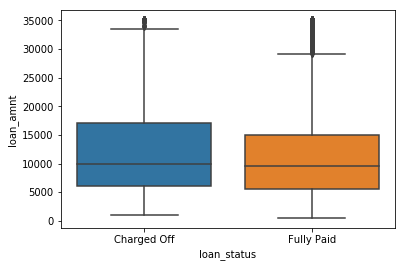

In [266]:
#loan Status vs Loan Amount (Segmented Analysis)
#A plot showing the representative amount of Loan Amount.
sns.boxplot(x='loan_status', y='loan_amnt', data=master_frame_loan)
plt.show()

**Conclusion**:<br>
 If the loan amount is more, more is the changes of getting default

#### loan status (Charged-off) vs emp_length

In [267]:
#loan status (Charged-off) vs emp_length
Charged_off = master_frame_loan[(master_frame_loan["loan_status"]=='Charged Off')]
Charged_off.emp_length.value_counts()

10    1233
1      939
2      529
3      521
4      427
5      422
6      287
7      248
8      191
9      147
Name: emp_length, dtype: int64

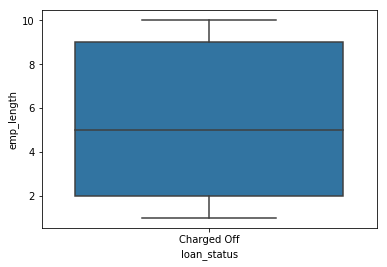

In [268]:
#A plot showing the representative loan status (Charged-off) vs emp_length
sns.boxplot(x='loan_status', y='emp_length', data=Charged_off)
plt.show()

#### loan status (Fully Paid) vs emp_length

In [270]:
#loan status (Fully Paid) vs emp_length
Fully_Paid = master_frame_loan[(master_frame_loan["loan_status"]=='Fully Paid')]
Fully_Paid.emp_length.value_counts()

10    6796
1     6000
2     3554
3     3312
4     2781
5     2623
6     1776
7     1390
8     1170
9     1030
Name: emp_length, dtype: int64

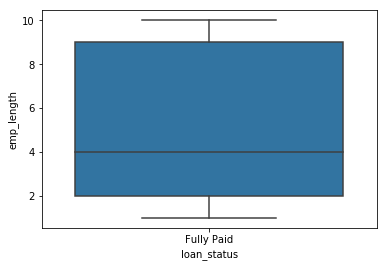

In [271]:
#A plot showing the representative loan status (Fully Paid) vs emp_length
sns.boxplot(x='loan_status', y='emp_length', data=Fully_Paid)
plt.show()

#### annual_inc vs emp_length

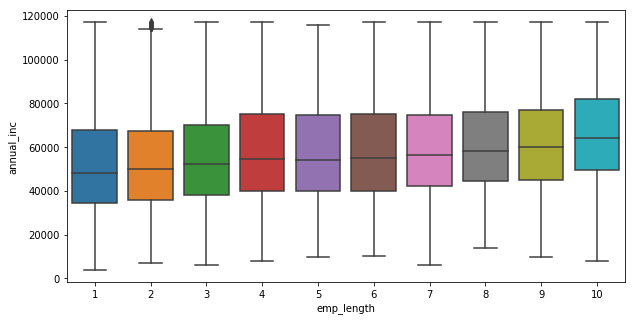

In [272]:
#annual_inc vs emp_length
# More experience, higher salary
ax, fig = plt.subplots(figsize=[10,5])
ax = sns.boxplot(x='emp_length', y='annual_inc', data=master_frame_loan_an_in)
plt.show()

**Conclusion**:<br>
  More experience, higher salary

#### Loan Amount vs grade

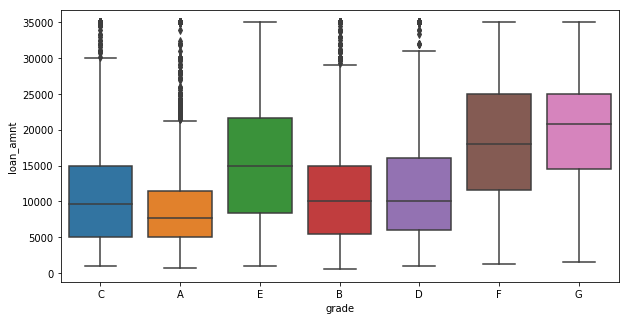

In [273]:
#Loan Amount vs grade
ax, fig = plt.subplots(figsize=[10,5])
ax = sns.boxplot(x='grade', y='loan_amnt', data=master_frame_loan)
plt.show()

**Conclusion**:<br>
  People with Grade A have less loan amount, People with Grade G have more loan amount

#### loan Status (Charged - off) vs grade

In [274]:
#loan Status (Charged - off) vs grade
Charged_off = master_frame_loan[(master_frame_loan["loan_status"]=='Charged Off')]
Charged_off.grade.value_counts()

B    1253
C    1170
D     980
E     649
A     513
F     286
G      93
Name: grade, dtype: int64

In [275]:
#purpose vs loan Status (Charged - off)
# Customers taking loan for debt_consolidation, credit_card & others are defaulting more.
Charged_off = master_frame_loan[(master_frame_loan["loan_status"]=='Charged Off')]
Charged_off.purpose.value_counts()

debt_consolidation    2510
other                  546
credit_card            479
small_business         356
home_improvement       296
major_purchase         190
car                    149
medical                 95
wedding                 83
moving                  79
house                   52
vacation                49
educational             45
renewable_energy        15
Name: purpose, dtype: int64

In [276]:
#home_ownership vs loan Status (Charged - off)
Charged_off = master_frame_loan[(master_frame_loan["loan_status"]=='Charged Off')]
Charged_off.home_ownership.value_counts()

RENT        2518
MORTGAGE    2062
OWN          346
OTHER         18
Name: home_ownership, dtype: int64

In [277]:
#revol_util vs loan Status (Charged - off)
#If Revolving line utilization rate is more, greater is the chances of default 
Charged_off = master_frame_loan[(master_frame_loan["loan_status"]=='Charged Off')]
Charged_off.revol_util_percent.value_counts()

0.000     122
66.600     16
63.700     14
73.400     14
77.600     13
66.300     13
45.100     13
71.700     13
89.500     12
32.000     12
66.700     12
80.300     12
72.700     12
57.700     12
94.600     12
81.600     11
64.200     11
70.800     11
68.500     11
89.900     11
89.400     11
75.500     11
57.400     11
99.300     11
76.000     11
80.600     11
85.700     11
62.800     11
48.000     11
98.700     10
81.100     10
87.200     10
81.700     10
95.300     10
87.600     10
90.300     10
73.800     10
78.500     10
97.500     10
51.600     10
0.200      10
50.000     10
72.400     10
94.200     10
98.400     10
35.700     10
42.000     10
95.200     10
59.600     10
74.500     10
93.200     10
55.500     10
64.600      9
72.300      9
93.000      9
92.400      9
60.100      9
68.100      9
68.800      9
87.700      9
54.800      9
98.300      9
94.400      9
91.100      9
31.100      9
74.400      9
47.400      9
59.500      9
90.000      9
59.300      9
58.200      9
64.500

#### Terms vs Loan Amount

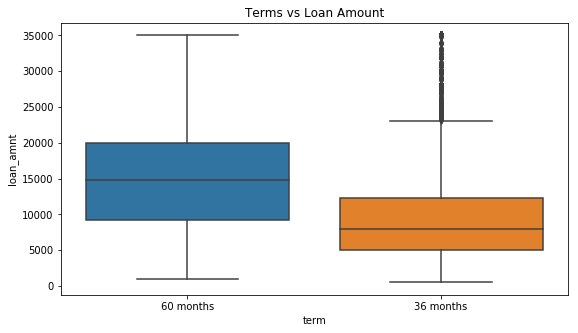

In [278]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=master_frame_loan.loan_amnt, data=master_frame_loan)
plt.title('Terms vs Loan Amount')
plt.show()

**Conclusion**:<br>
  Higher loan amount have high tenure i.e, 60 months

#### home_ownership vs Loan Amount

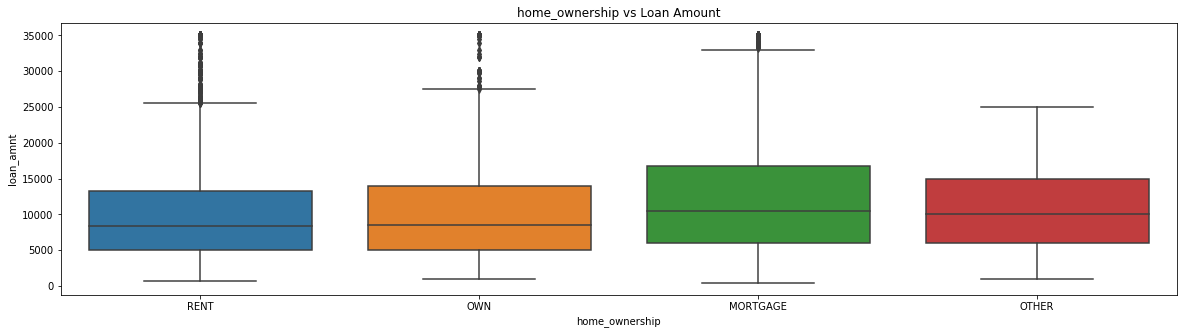

In [279]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=master_frame_loan.loan_amnt, data=master_frame_loan)
plt.title('home_ownership vs Loan Amount')
plt.show()


**Conclusion**:<br>
  More borrowers are from MORTGAGE 

#### purpose vs Loan Amount

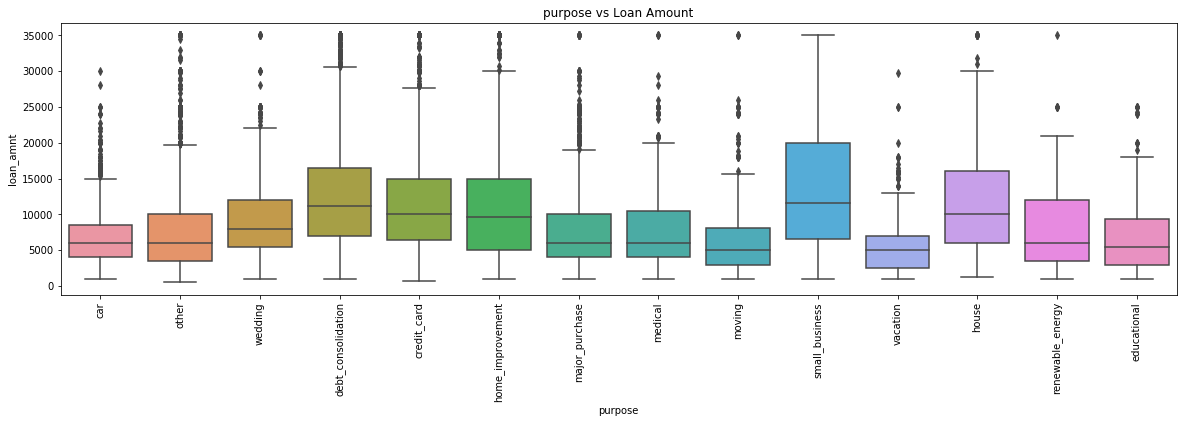

In [280]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=master_frame_loan.loan_amnt, data=master_frame_loan)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

**Conclusion**:<br>
More loan amount is taken for Small bussiness followed by debt consolidation.

#### emp_length vs Loan Amount

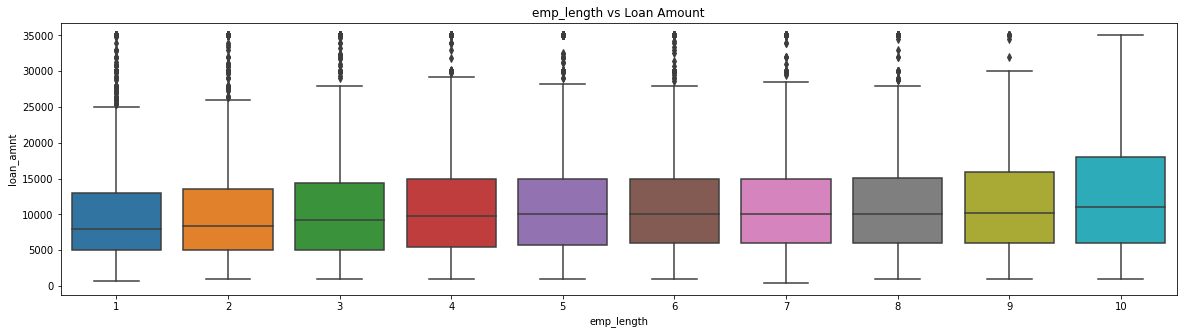

In [281]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=master_frame_loan.loan_amnt, data=master_frame_loan)
plt.title('emp_length vs Loan Amount')
plt.show()

**Conclusion**:<br>
  More borrowers are with employment length 10.

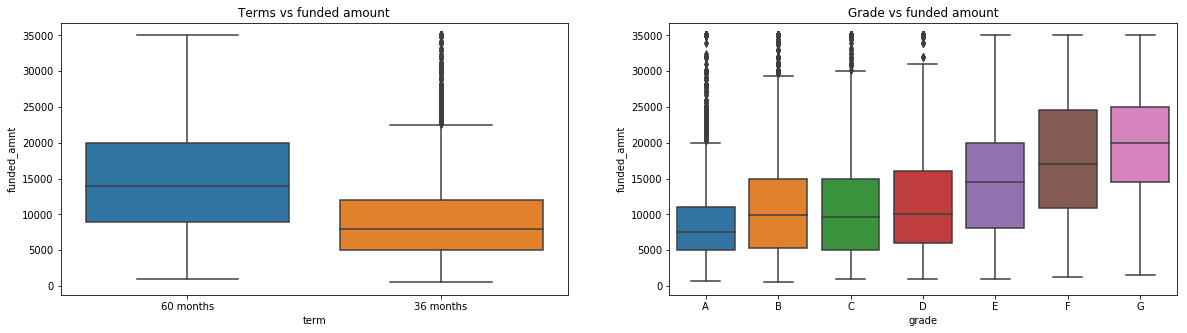

In [282]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=master_frame_loan.funded_amnt, data=master_frame_loan)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = master_frame_loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=master_frame_loan.funded_amnt, order = grade_ord, data=master_frame_loan)
plt.show()

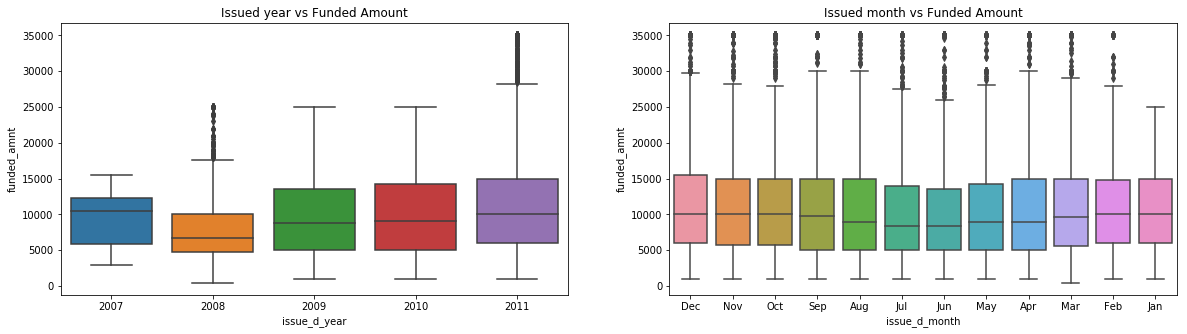

In [283]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=master_frame_loan.issue_d_year, y=master_frame_loan.funded_amnt, data=master_frame_loan)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=master_frame_loan.issue_d_month, y=master_frame_loan.funded_amnt, data=master_frame_loan)
plt.title('Issued month vs Funded Amount')
plt.show()

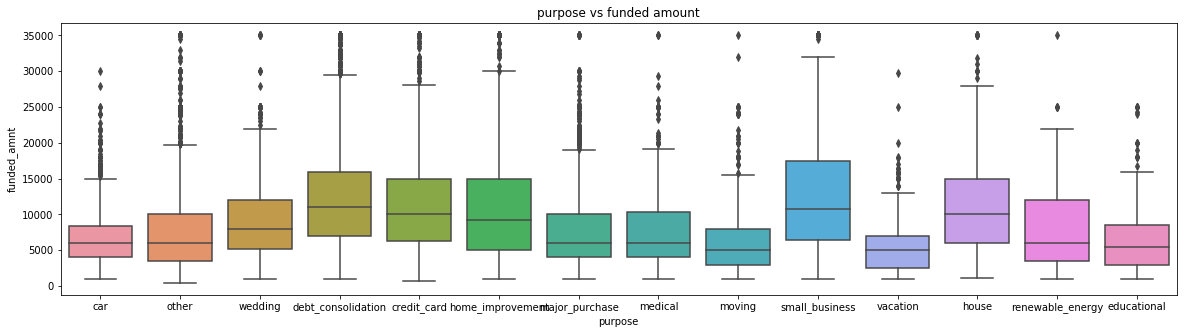

In [284]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=master_frame_loan.funded_amnt, data=master_frame_loan)
plt.title('purpose vs funded amount')
plt.show()

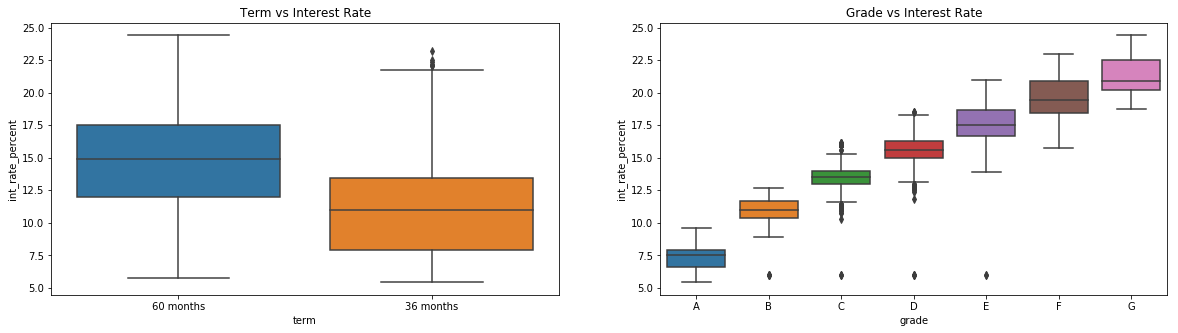

In [285]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=master_frame_loan.int_rate_percent, data=master_frame_loan)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = master_frame_loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=master_frame_loan.int_rate_percent, order = grade_ord, data=master_frame_loan)
plt.show()

**Conclusion**:<br>
  Higher is the interest rates, Higher is the tenure of loans.

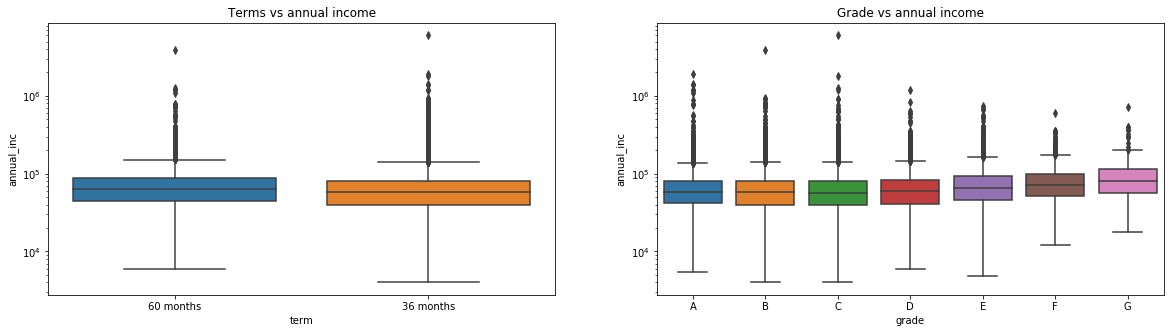

In [286]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=master_frame_loan.annual_inc, data=master_frame_loan)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = master_frame_loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=master_frame_loan.annual_inc, order = grade_ord, data=master_frame_loan)
plt.yscale('log')

**Conclusion**:<br>
  Annual Income is higher for lower grades 

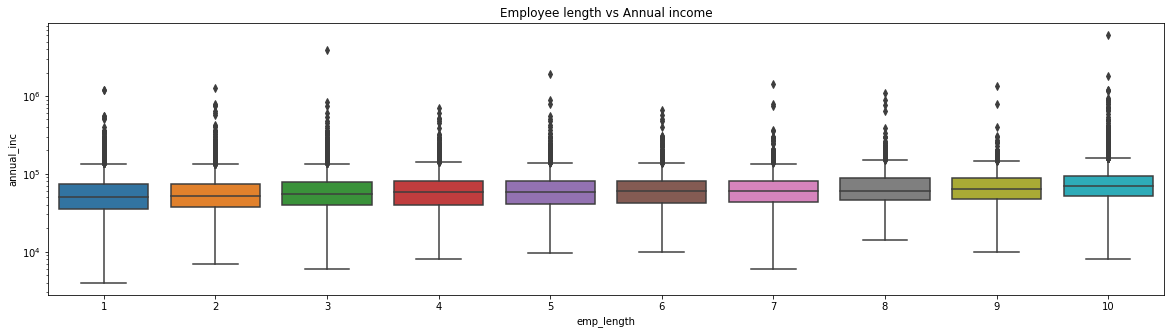

In [287]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=master_frame_loan.annual_inc, data=master_frame_loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**Conclusion**:<br>
  Borrower's having higer income taken loans for 10+ years of duration.

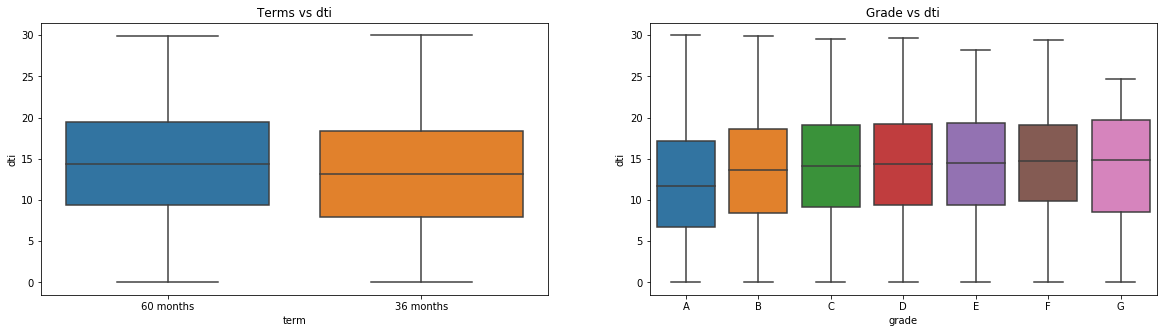

In [288]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=master_frame_loan.dti, data=master_frame_loan)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = master_frame_loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=master_frame_loan.dti, order = grade_ord, data=master_frame_loan)
plt.show()

**Conclusion**:<br>
DTI is higher for people having more tenure i.e., 60 months.<br>
Borrowers with A Grade are having low DTI than Other grades.

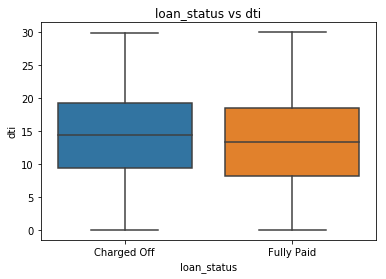

In [289]:
sns.boxplot(x='loan_status', y=master_frame_loan.dti, data=master_frame_loan)
plt.title('loan_status vs dti')
plt.show()

**Conclusion**:<br>
Borrowers with high DTI has little more probability to default

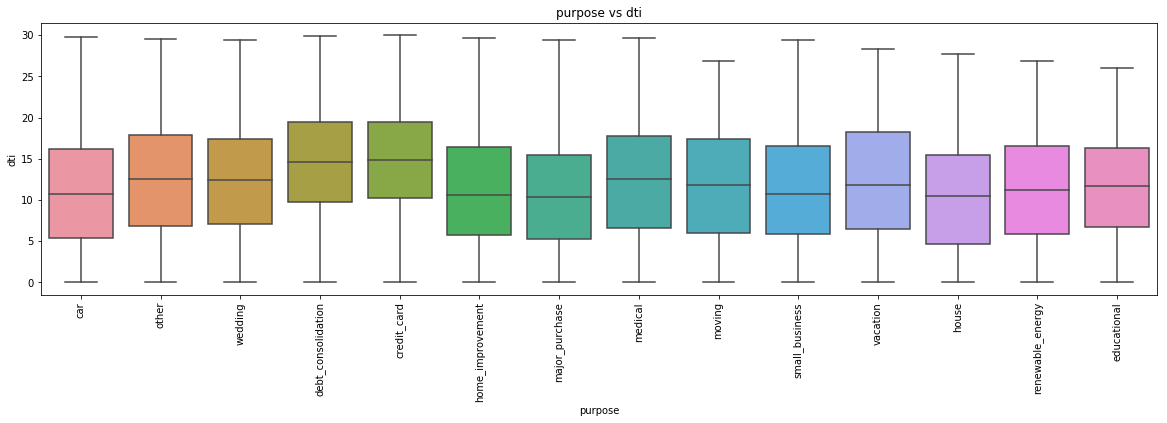

In [290]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=master_frame_loan.dti, data=master_frame_loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

**Conclusion**:<br>
People who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

### 3.3 Bivariate Analysis
#### Term vs Loan Status

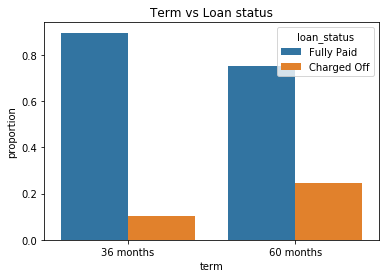

In [294]:
#Proportion of values for each category
df_term_loan_st = master_frame_loan.groupby(['term', 'loan_status'],as_index=False)['id'].count()
df_term_loan_st['proportion'] = df_term_loan_st.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df_term_loan_st, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')
plt.show()

**Conclusion**:<br>
More proportion of borrowers defaulted loan in 60 months tenure than 36 months.<br>
Fully Paid rate is higher in 36 months tenure.

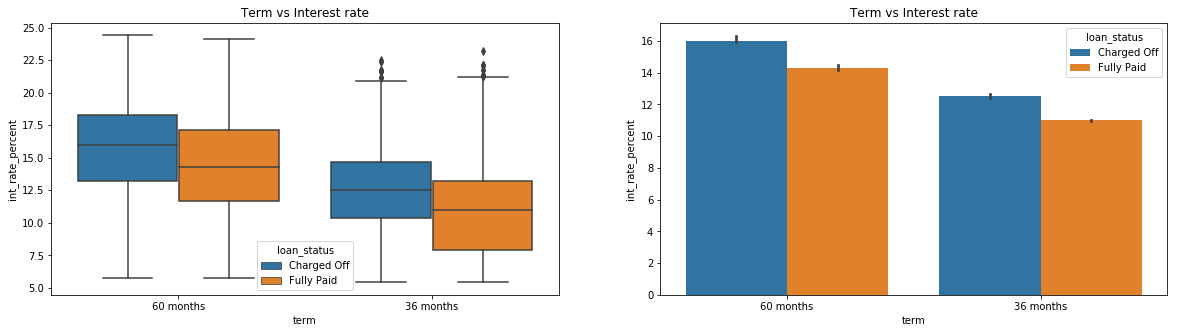

In [296]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate_percent', hue='loan_status', data=master_frame_loan)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate_percent', hue='loan_status', data=master_frame_loan, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Conclusion**:<br>
In case of higher interest rates, the deafult rate is higher in both 36 and 60 months tenure.

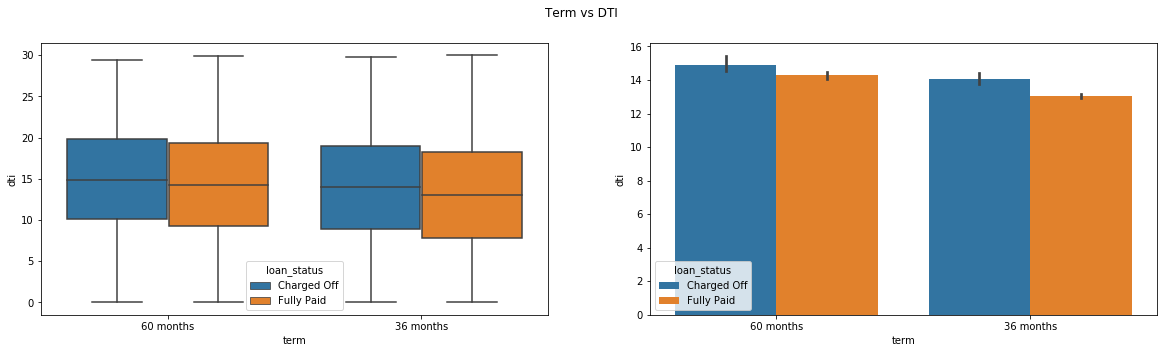

In [297]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=master_frame_loan)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=master_frame_loan, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Conclusion**:<br>
Charge-off are comparatively higher than fully-paid for the Debit to income ratio

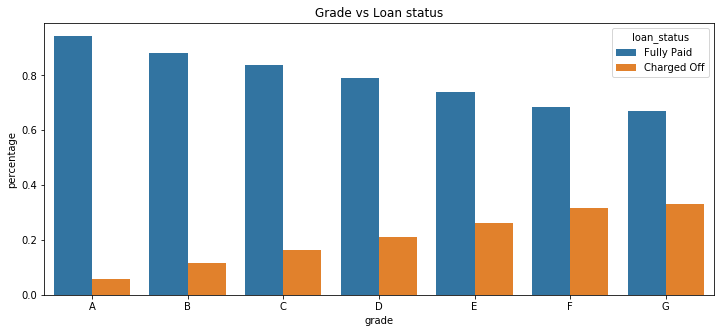

In [298]:
df_grade_loan_st = master_frame_loan.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df_grade_loan_st['percentage'] = df_grade_loan_st.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df_grade_loan_st, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')
plt.show()

**Conclusion**:<br>
Charged off increases as grades decreases.

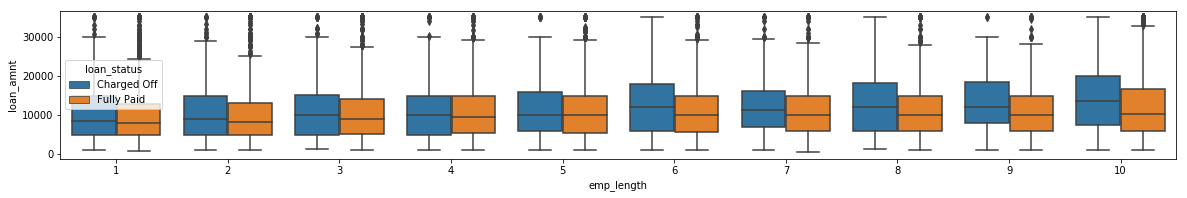

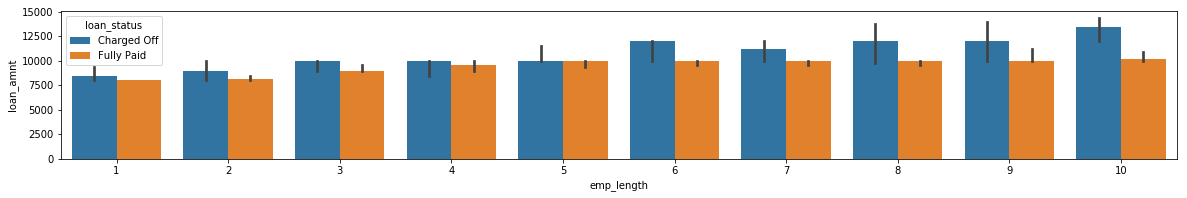

In [299]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=master_frame_loan)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=master_frame_loan, estimator=np.median)
plt.show()

**Conclusion**:<br>
Borrowers with higher employment lengths took more loan amounts resulting more default rate

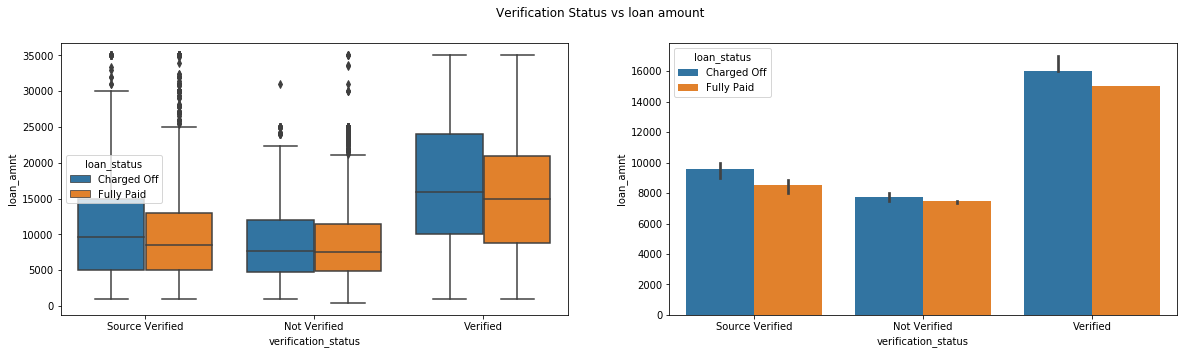

In [300]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=master_frame_loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=master_frame_loan, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Conclusion**:<br>
Verified borowers are given more loan amounts compared to others

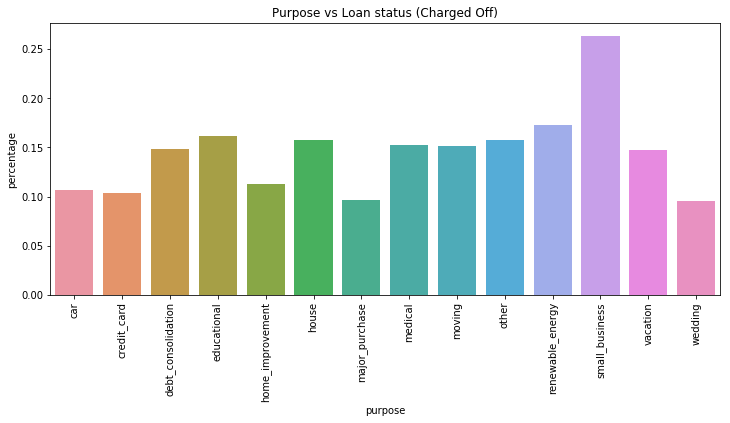

In [301]:
df_pur_loan_st = master_frame_loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df_pur_loan_st['percentage'] = df_pur_loan_st.groupby('purpose').transform(lambda x: x/x.sum())
df_pur_loan_st = df_pur_loan_st[df_pur_loan_st.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df_pur_loan_st)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

**Conclusion**:<br>
Charge Offs are higher for small businesse